## **Description du corpus**
- Nombre de sites distincts qui ont été aspirés
- Nombre de documents aspirés / Nombre moyen de documents par site, minimum, maximum
- Nombre de types/tokens / Nombre moyen de types/tokens par site, minimum, maximum

*Nombre de sites distincts*  
Pour chaque acteur, ouvrir les CSV contenanant la liste des URLs et compter le unique de noms de domaines;  
Pour ce faire, splitter l'URL et retenir le nom de domaine 

#### **Acteurs du système de santé dont les sites Web nous intéressent pour la constitution du corpus**

In [2]:
from pandas import *
from pathlib import Path
import os, re, shutil, nltk

path = '/Users/camilledemers/Documents/03-corpus/0-listes_sites_html_pdf/'

os.chdir(path)

nb = len([file for file in os.listdir() if file.endswith('csv')])  # (le chum se trouve déjà dans chu_iu (=-1), mais les cliniques médicales été oubliés pour le scraping des PDFs (à corriger) (+1)
print('Les sites Web de {} acteurs ont été aspirés pour constituer notre corpus :'.format(nb))
for file in os.listdir():
    if file.endswith('csv') and not 'chum' in file:
        print(file[:-4])
print('cliniques_medicales')

Les sites Web de 15 acteurs ont été aspirés pour constituer notre corpus :
msss
gmf
inesss
quebec_sante
ramq
chsld
urgence_sante
chu_iu
asso_ordres
inspq
cisss_ciusss
csbe
sante_mtl
ophq
cliniques_medicales


#### **Nombre de sites aspirés**

In [3]:
nb_domaines = 0
domaines = []

for file in os.listdir():
    if file.endswith('csv') and not 'chum' in file:
        # encoding= 'ISO-8859-1' "utf-8"
        # sep = ';' ','
        try:
            with open(path + file, encoding = 'ISO-8859-1') as f:
                csv = read_csv(f, sep=';')

        except: 
            try: 
                with open(path + file, encoding = 'ISO-8859-1') as f:
                    csv = read_csv(f, sep=',')
            
            except: 
                try:
                    with open(path + file, encoding = 'utf-8') as f:
                        csv = read_csv(f, sep= ',')

                except: 
                    try:
                        with open(path + file, encoding = 'utf-8') as f:
                            csv = read_csv(f, sep= ';')

                    except Exception as e:
                        print(file + '-' + str(e))

        urls = csv['Address'].tolist()
        regex = 'https?://(www)?1?\.?(\w+)'
        try:
            domaines += [re.match(regex, url).group(2) for url in urls]
        except Exception as e:
            True
            #print(file + '-' + str(e))

In [4]:
domaines += ['ramq', 'sante_mtl', 'urgence_sante']
domaines = set(domaines)
nb_domaines = len(domaines) + 22 # (cisss/ciusss)


In [5]:
print('{} sites distincts ont été aspirés au total'.format(nb_domaines))

197 sites distincts ont été aspirés au total


#### **Nombre de documents** (fr)

In [6]:
# En français 
path = '/Users/camilledemers/Documents/03-corpus/2-data/1-fr/'

os.chdir(path)

nb_docs_fr = 0
dossiers = [f for f in os.listdir() if os.path.isdir(path + f) and not (f == 'mf')]
print('Voici le nombre de documents (HTML ou PDF) aspirés pour chacun des ' + str(len(dossiers)-1) + ' acteurs considérés.\n(Noter que le chum devrait se trouver sous CHU_IU)')
for folder in dossiers:
    os.chdir(path + folder)
    nb_doc = [file for file in os.listdir() if file.endswith('.txt') and not '_en' in file and not 'corpus' in file]
    print(folder + ' : ' + str(len(nb_doc)) + ' documents.')
    nb_docs_fr += len(nb_doc)

print('\nAu total, notre corpus francophone compte donc un total de {} documents.'.format(nb_docs_fr)+'\nOn a donc un une moyenne d\'environ {} documents par site (mais ça varie considérablement d\'un site à l\'autre).'.format(round(nb_docs_fr/157)))

Voici le nombre de documents (HTML ou PDF) aspirés pour chacun des 15 acteurs considérés.
(Noter que le chum devrait se trouver sous CHU_IU)
chum : 2298 documents.
inspq : 4341 documents.
ophq : 3071 documents.
urgence_sante : 342 documents.
msss : 9745 documents.
cliniques_medicales : 529 documents.
chsld : 1009 documents.
chu_iu : 7351 documents.
cisss_ciusss : 35951 documents.
gmf : 1912 documents.
quebec_sante : 240 documents.
inesss : 1817 documents.
csbe : 421 documents.
ramq : 4633 documents.
sante_mtl : 5256 documents.
asso_ordres : 36164 documents.

Au total, notre corpus francophone compte donc un total de 115080 documents.
On a donc un une moyenne d'environ 733 documents par site (mais ça varie considérablement d'un site à l'autre).


#### **Nombre de tokens** (fr)

In [8]:
from nltk.tokenize import RegexpTokenizer
# Seulement les caractères alphabétiques
tokenizer_re = RegexpTokenizer(r"\w\'|\w+")

# En français 
base_path = '/Users/camilledemers/Documents/03-corpus/2-data/1-fr/'

os.chdir(path)

nb_tokens_fr = 0
nb_types = set()

dossiers = [f for f in os.listdir() if os.path.isdir(path + f) and not (f == 'mf')]
print('Voici le nombre de tokens et de formes uniques pour chacun des ' + str(len(dossiers)-1) + ' acteurs considérés.')
for folder in dossiers:
    os.chdir(path + folder)
    corpus = []
    for file in os.listdir():
        if file.endswith(".txt") and not file.endswith('-corpus_FR.txt') and not 'PDF' in file:
            file_path = path + folder + '/' + file
            
            with open(file_path, 'r', encoding = "UTF-8") as f:
                data = f.readlines()
                text = re.sub('\d', '', data[1].strip('\n').lower().replace('’', '\''))
                text = text.replace('  ', ' ')
            corpus.append(text)

    tokens = nltk.flatten([tokenizer_re.tokenize(doc) for doc in corpus])
    types = set()
    for t in set(tokens):
        types.add(t)
    len_corpus = len(tokens)

    print(folder + ' : ' + str(len_corpus) + ' tokens (' + str(len(types)) +' formes uniques).')
    nb_tokens_fr += len_corpus
    for t in types:
        nb_types.add(t)


Voici le nombre de tokens et de formes uniques pour chacun des 15 acteurs considérés.
chum : 878876 tokens (26725 formes uniques).
inspq : 39223816 tokens (103369 formes uniques).
ophq : 4077518 tokens (15221 formes uniques).
urgence_sante : 226228 tokens (7384 formes uniques).
msss : 5281333 tokens (28758 formes uniques).
cliniques_medicales : 783564 tokens (8779 formes uniques).
chsld : 284351 tokens (7566 formes uniques).
chu_iu : 23874137 tokens (741312 formes uniques).
cisss_ciusss : 17816953 tokens (68434 formes uniques).
gmf : 951284 tokens (15769 formes uniques).
quebec_sante : 217212 tokens (8982 formes uniques).
inesss : 3235449 tokens (19713 formes uniques).
csbe : 135010 tokens (4476 formes uniques).
ramq : 92903404 tokens (26414 formes uniques).
sante_mtl : 3703612 tokens (19331 formes uniques).
asso_ordres : 94152273 tokens (1902010 formes uniques).


In [12]:
# CHUM

# x = nombre de nouvelles formes
# y = nombre de documents considérés 

x = []

for i in range(16): # On va aller jusqu'à max 115 000 documents (on en a 115 080)
    a = 2000
    x.append(30000 + (a * i))

x

[30000,
 32000,
 34000,
 36000,
 38000,
 40000,
 42000,
 44000,
 46000,
 48000,
 50000,
 52000,
 54000,
 56000,
 58000,
 60000]

In [13]:
import nltk
from nltk.tokenize import RegexpTokenizer
# Seulement les caractères alphabétiques
tokenizer_re = RegexpTokenizer(r"\w\'|\w+")

from pandas import *
import re 
base_path = '/Users/camilledemers/Documents/03-corpus/2-data/1-fr/'

y = []
corpus = []
os.chdir(base_path)
for file in os.listdir():
    if file.endswith('.csv'):  
        print(file)
        with open(file, 'r', encoding = "UTF-8") as f:
            data = read_csv(f)
            text = data['text'].tolist()
            corpus += [(re.sub('\d', '', str(t).strip('\n').lower().replace('’', '\'').replace('  ', ' '))) for t in text]


cliniques_medicales.csv
msss.csv
gmf.csv
inesss.csv
quebec_sante.csv
ramq.csv
chsld.csv
urgence_sante.csv
chu_iu.csv
asso_ordres.csv
inspq.csv
chum.csv
cisss_ciusss.csv
csbe.csv
sante_mtl.csv
ophq.csv


In [14]:
len(corpus)

114518

In [17]:
types = set()

for valeur in x:
    if (len(corpus) > valeur):
        tokens = nltk.flatten([tokenizer_re.tokenize(doc) for doc in corpus[:valeur]])
        for t in set(tokens):
            types.add(t)
        y.append(len(types))
        print("Nombre de documents considérés : " + str(valeur) + " - " + str(len(types)) + " formes uniques.")

Nombre de documents considérés : 30000 - 311416 formes uniques.
Nombre de documents considérés : 32000 - 314201 formes uniques.
Nombre de documents considérés : 34000 - 316995 formes uniques.
Nombre de documents considérés : 36000 - 318828 formes uniques.
Nombre de documents considérés : 38000 - 320438 formes uniques.
Nombre de documents considérés : 40000 - 322425 formes uniques.


In [7]:
x = [0, 61979, 104195, 143904, 181763, 208832, 213273, 217819, 224751, 225012, 237063, 257106, 275844, 294976, 307781, 311416]

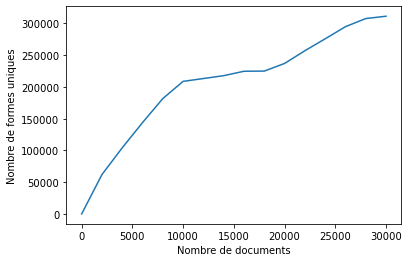

In [9]:
import matplotlib.pyplot as plt
plt.plot(y, x)
plt.ylabel('Nombre de formes uniques')
plt.xlabel('Nombre de documents')
plt.show()

In [9]:
print('\nAu total, notre corpus francophone compte donc un total de {} tokens'.format(nb_tokens_fr)+' (et {} formes uniques).'.format(len(nb_types)))


Au total, notre corpus francophone compte donc un total de 287745020 tokens (et 2433589 formes uniques).
